Importing modules

In [8]:
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [11]:
print(len(train_data))
print(len(test_data))
print(train_data[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Preparing the data

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)

one_hot_test_labels = to_one_hot(test_labels)


Or

In [0]:
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Building Network


In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compile

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 277us/sample - loss: 2.6391 - acc: 0.4965 - val_loss: 1.7584 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 155us/sample - loss: 1.4162 - acc: 0.7129 - val_loss: 1.3163 - val_acc: 0.7050
Epoch 3/20
7982/7982 [==============================] - 1s 157us/sample - loss: 1.0360 - acc: 0.7815 - val_loss: 1.1335 - val_acc: 0.7580
Epoch 4/20
7982/7982 [==============================] - 1s 156us/sample - loss: 0.8080 - acc: 0.8286 - val_loss: 1.0249 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 158us/sample - loss: 0.6419 - acc: 0.8690 - val_loss: 0.9591 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 158us/sample - loss: 0.5097 - acc: 0.8961 - val_loss: 0.9539 - val_acc: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 156us/sample - loss: 0.4085 - acc: 0.9176 - val_loss: 0.9261 - va

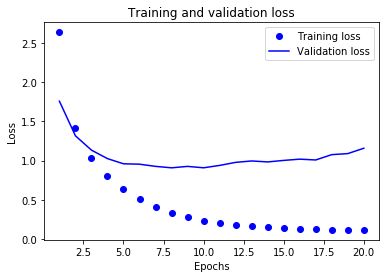

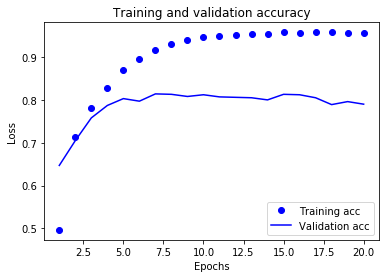

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
predictions = model.predict(x_test)

In [21]:
predictions.shape

(2246, 46)

In [22]:
predictions[1].sum()

0.99999976

In [23]:
predictions[1].argmax()


10

Alternate approach for Labels instead of One hot encoding

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512)

Train on 8982 samples
Epoch 1/20
8982/8982 [==============================] - 2s 211us/sample - loss: 0.2346 - acc: 0.9401
Epoch 2/20
8982/8982 [==============================] - 1s 145us/sample - loss: 0.1576 - acc: 0.9477
Epoch 3/20
8982/8982 [==============================] - 1s 140us/sample - loss: 0.1392 - acc: 0.9523
Epoch 4/20
8982/8982 [==============================] - 1s 140us/sample - loss: 0.1282 - acc: 0.9546
Epoch 5/20
8982/8982 [==============================] - 1s 141us/sample - loss: 0.1216 - acc: 0.9546
Epoch 6/20
8982/8982 [==============================] - 1s 141us/sample - loss: 0.1188 - acc: 0.9545
Epoch 7/20
8982/8982 [==============================] - 1s 141us/sample - loss: 0.1143 - acc: 0.9537
Epoch 8/20
8982/8982 [==============================] - 1s 141us/sample - loss: 0.1132 - acc: 0.9550
Epoch 9/20
8982/8982 [==============================] - 1s 139us/sample - loss: 0.1046 - acc: 0.9581
Epoch 10/20
8982/8982 [==============================] - 1s 142us/sam

In [0]:
predictions = model.predict(x_test)

In [27]:
predictions.shape

(2246, 46)

In [28]:
predictions[1].argmax()

10